# Proyek Akhir: Menyelesaikan Permasalahan Jaya Jaya Institut


*   Nama: Bagus Angkasawan Sumantri Putra
*   Email: bagusasp01@gmail.com
*   ID Dicoding: bagusangkasawan




## Persiapan

### Mengimport library yang dibutuhkan

In [1]:
!pip install imbalanced-learn
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Beberapa library seperti `pandas`, `numpy`, `matplotlib`, `seaborn`, dan `scikit-learn` digunakan untuk proses pemrosesan data, visualisasi, serta pemodelan. Selain itu, juga digunakan `imbalanced-learn` untuk mengatasi distribusi target yang tidak seimbang.

## Data Understanding

In [2]:
df = pd.read_csv('data.csv', sep=';')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [4]:
df.head(10)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [5]:
df.shape

(4424, 37)

Dataset berisi **4424 baris dan 37 kolom**.

In [6]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [7]:
df.isna().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


In [8]:
df.duplicated().sum()

np.int64(0)

Tidak ditemukan **missing value** maupun **data duplikat**, sehingga data dapat dikatakan bersih.

In [9]:
df_new = df.drop(['Status'], axis=1)

In [10]:
Q1 = df_new.quantile(0.25)
Q3 = df_new.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = ((df_new < lower_bound) | (df_new > upper_bound)).sum()
outliers_iqr

,0
Marital_status,505
Application_mode,0
Application_order,541
Course,442
Daytime_evening_attendance,483
Previous_qualification,707
Previous_qualification_grade,179
Nacionality,110
Mothers_qualification,0
Fathers_qualification,0


Namun, sejumlah fitur masih memiliki **outlier**, yang dapat memengaruhi kinerja model.

In [11]:
skewness = df_new.skew()
print("Skewness of selected columns:")
print(skewness)

Skewness of selected columns:
Marital_status                                   4.399764
Application_mode                                 0.393036
Application_order                                1.881050
Course                                          -3.809135
Daytime_evening_attendance                      -2.507238
Previous_qualification                           2.871207
Previous_qualification_grade                     0.312867
Nacionality                                     10.703998
Mothers_qualification                            0.001978
Fathers_qualification                           -0.298697
Mothers_occupation                               5.339227
Fathers_occupation                               5.395173
Admission_grade                                  0.530600
Displaced                                       -0.194468
Educational_special_needs                        9.154976
Debtor                                           2.434652
Tuition_fees_up_to_date                   

Ditemukan juga **distribusi miring (skewness)** pada beberapa kolom numerik.

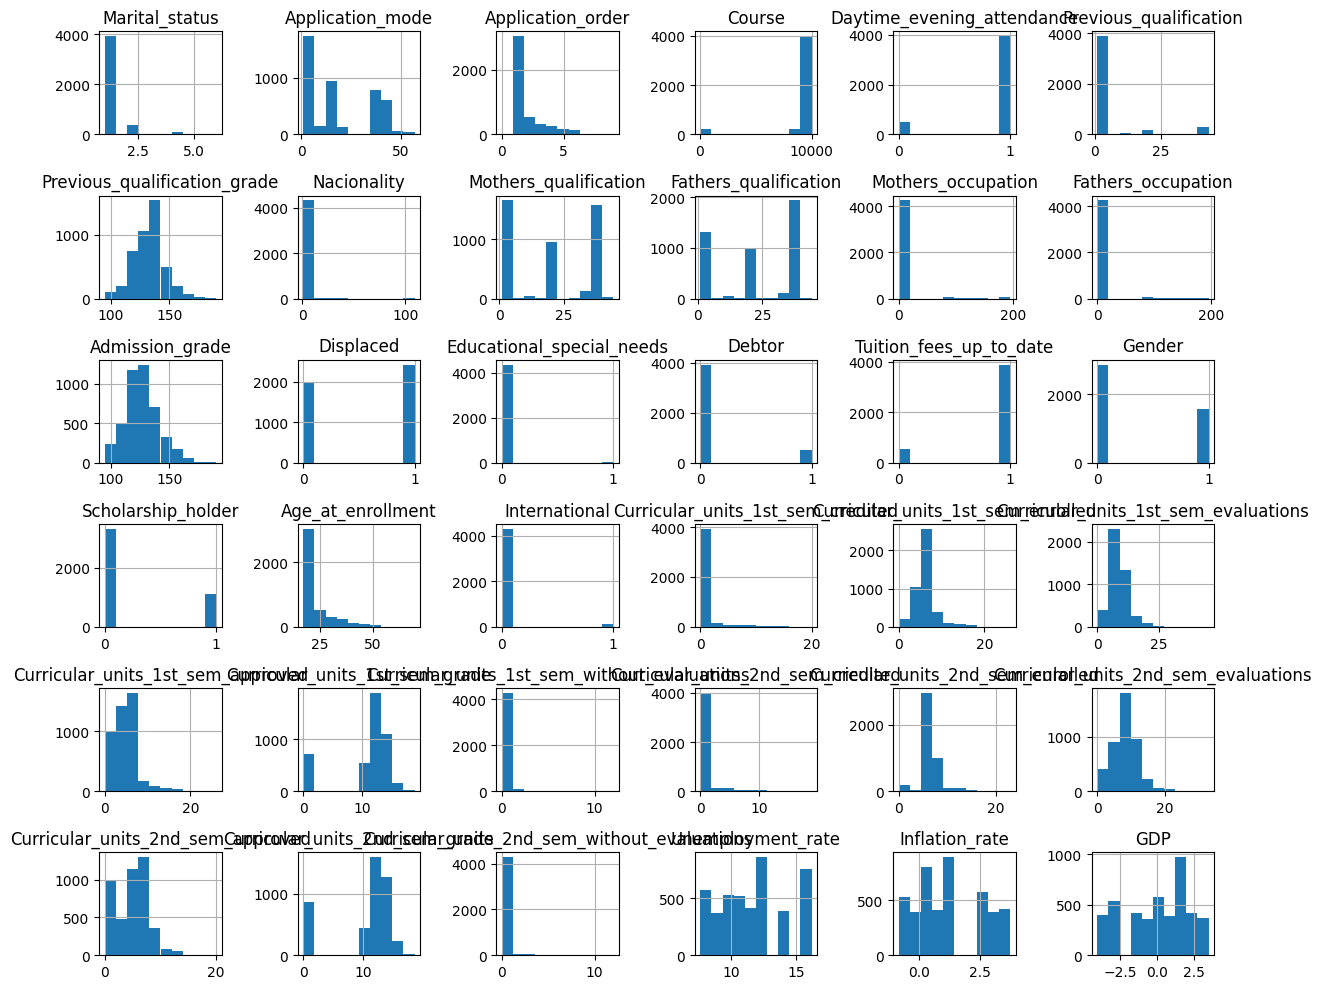

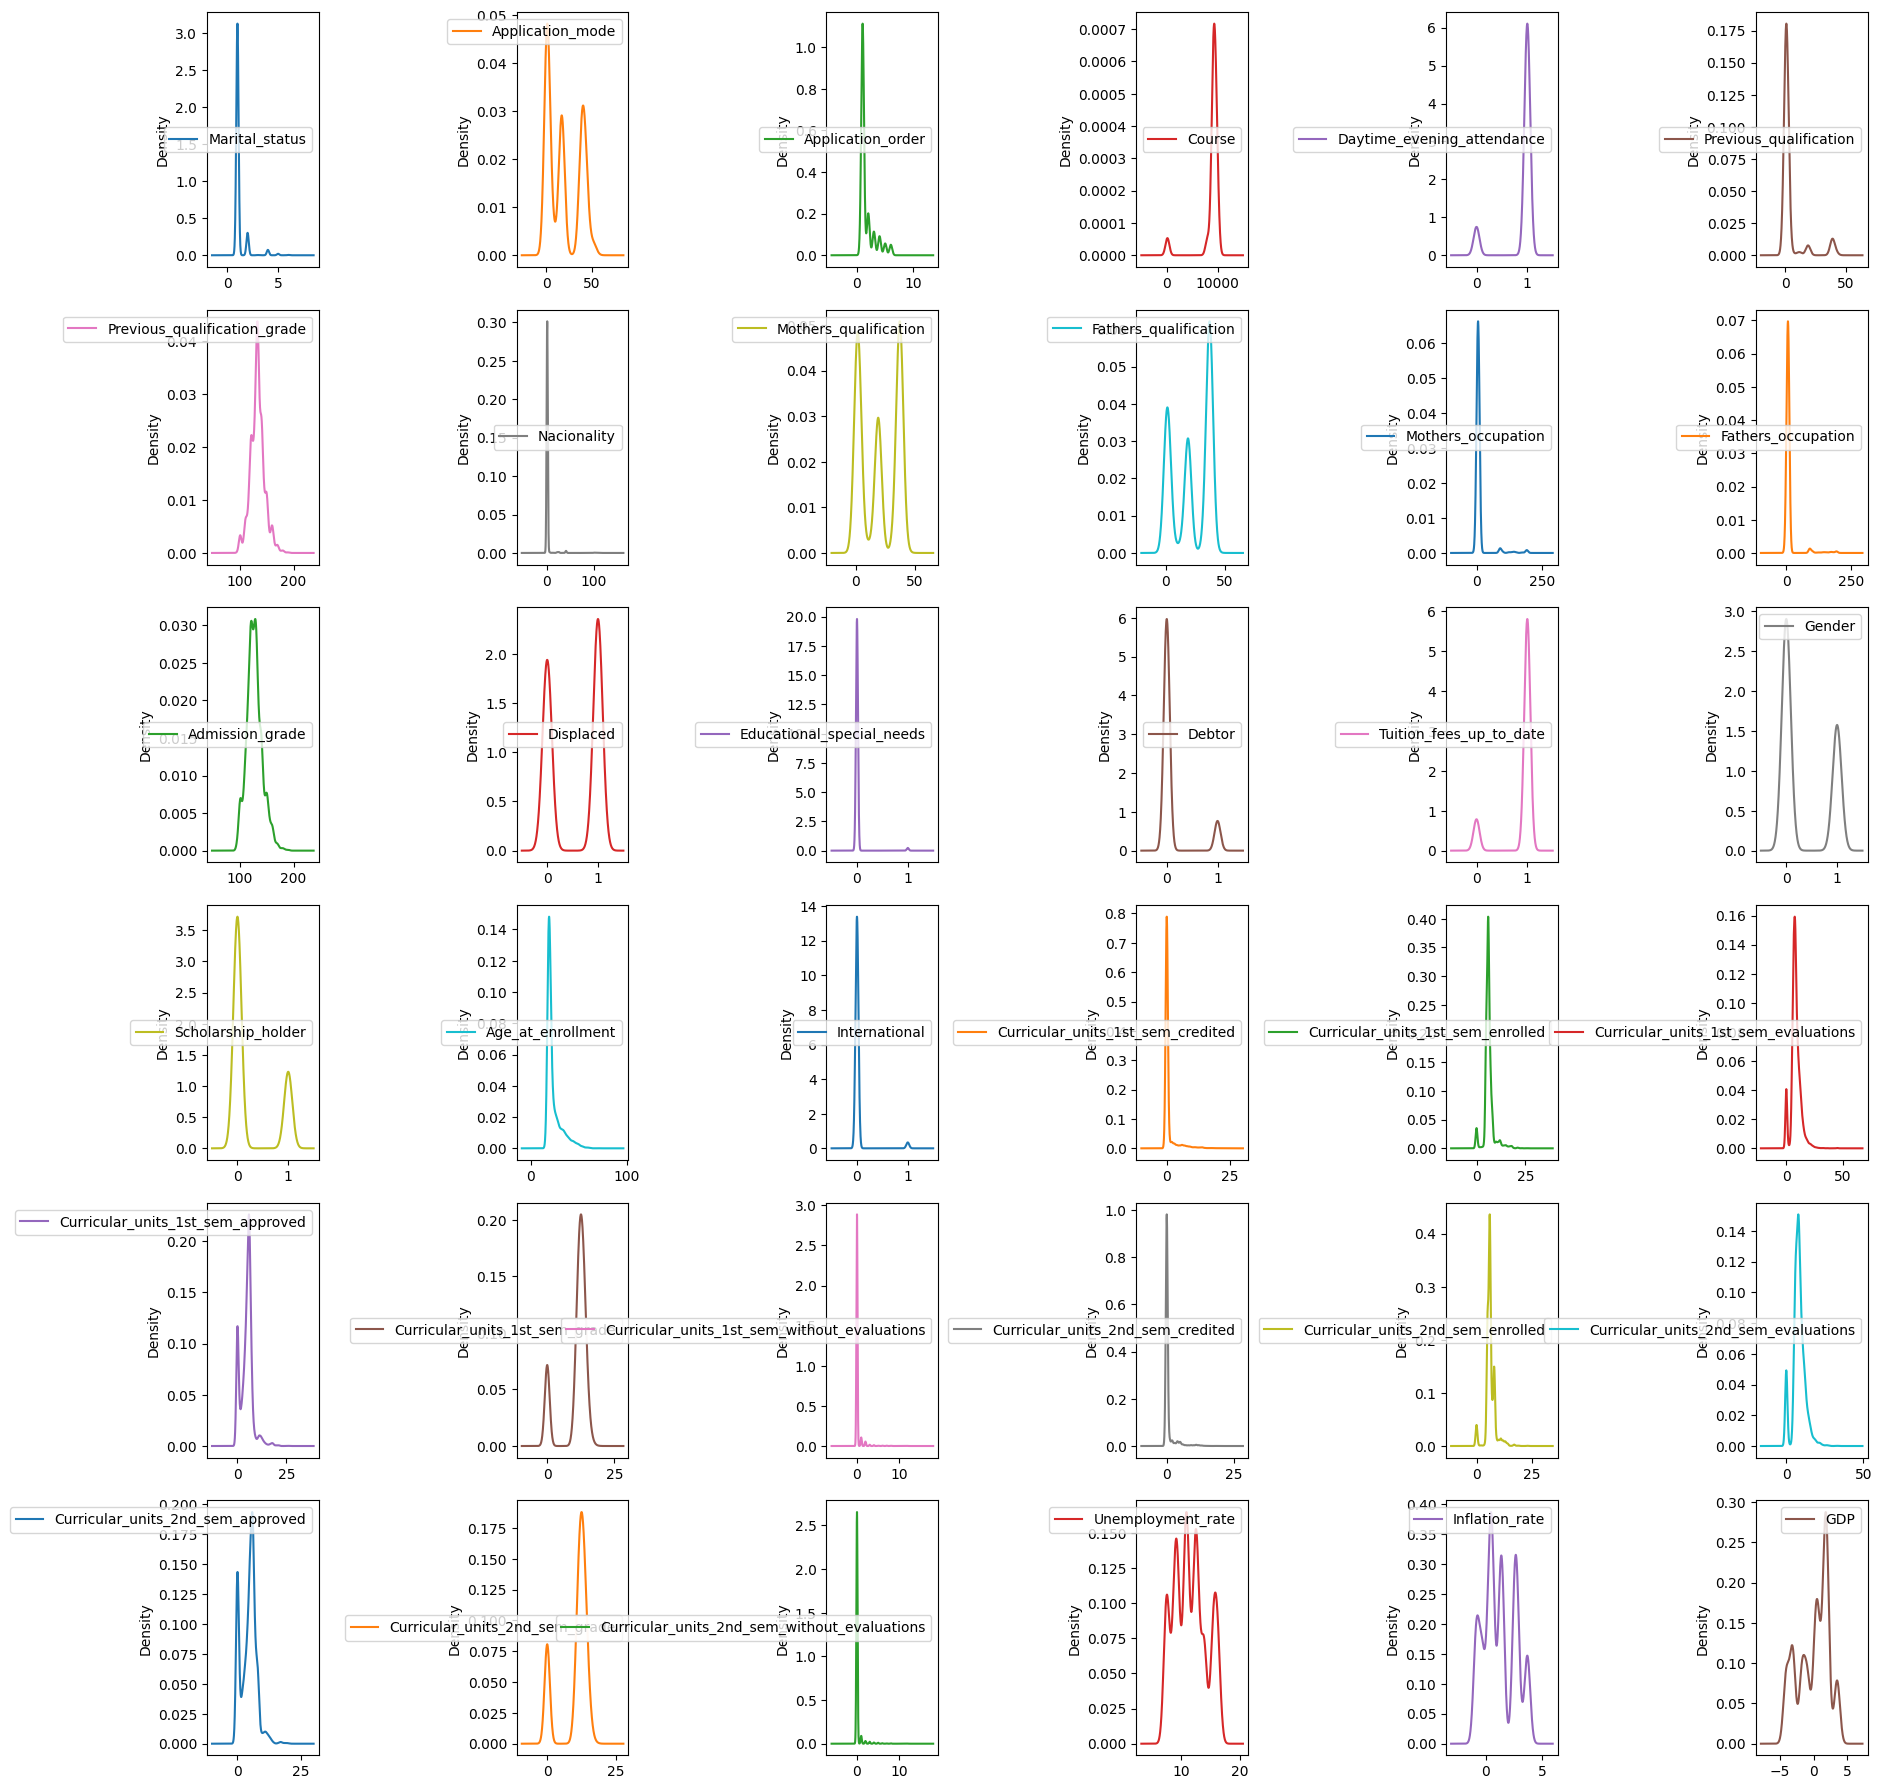

In [12]:
df_new.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

df_new.plot(kind='density', subplots=True, layout=(6, 6), figsize=(18, 18), sharex=False)
plt.tight_layout()
plt.show()

In [13]:
df['Status'].value_counts()

,count
Status,
Graduate,2209
Dropout,1421
Enrolled,794


Distribusi target tidak seimbang

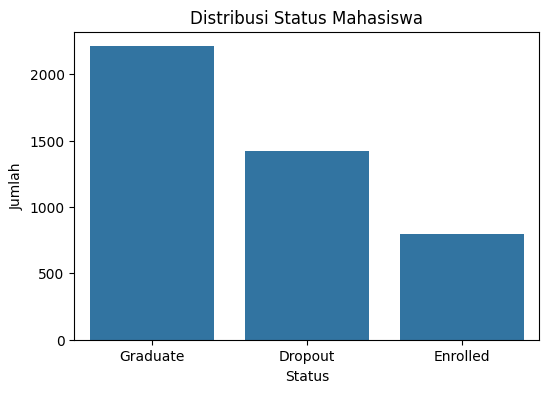

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Status', order=df['Status'].value_counts().index)
plt.title('Distribusi Status Mahasiswa')
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.show()

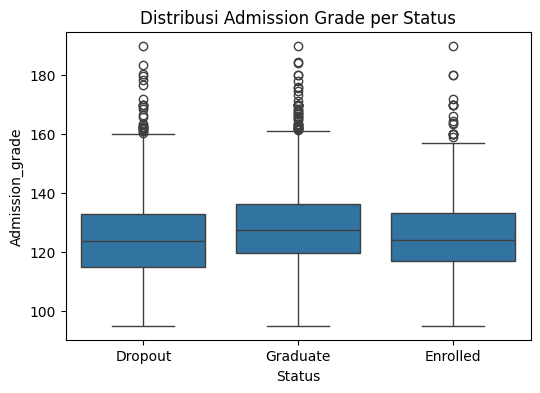

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Status', y='Admission_grade', data=df)
plt.title('Distribusi Admission Grade per Status')
plt.show()

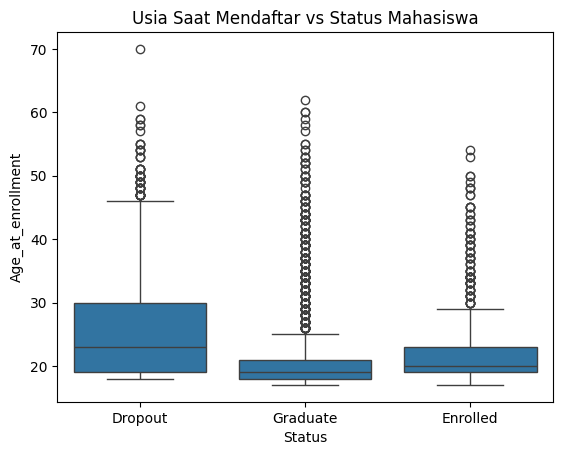

In [16]:
sns.boxplot(x='Status', y='Age_at_enrollment', data=df)
plt.title('Usia Saat Mendaftar vs Status Mahasiswa')
plt.show()

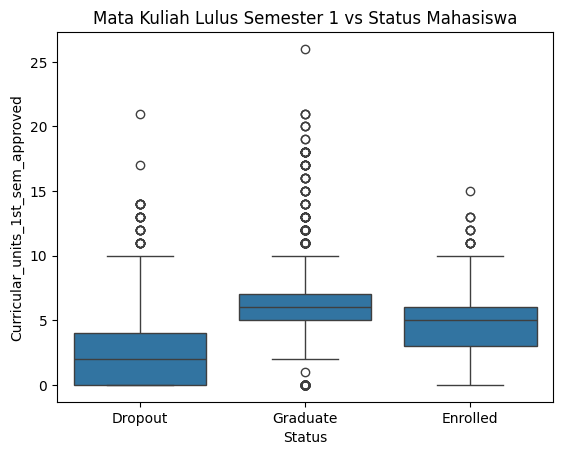

In [17]:
sns.boxplot(x='Status', y='Curricular_units_1st_sem_approved', data=df)
plt.title('Mata Kuliah Lulus Semester 1 vs Status Mahasiswa')
plt.show()

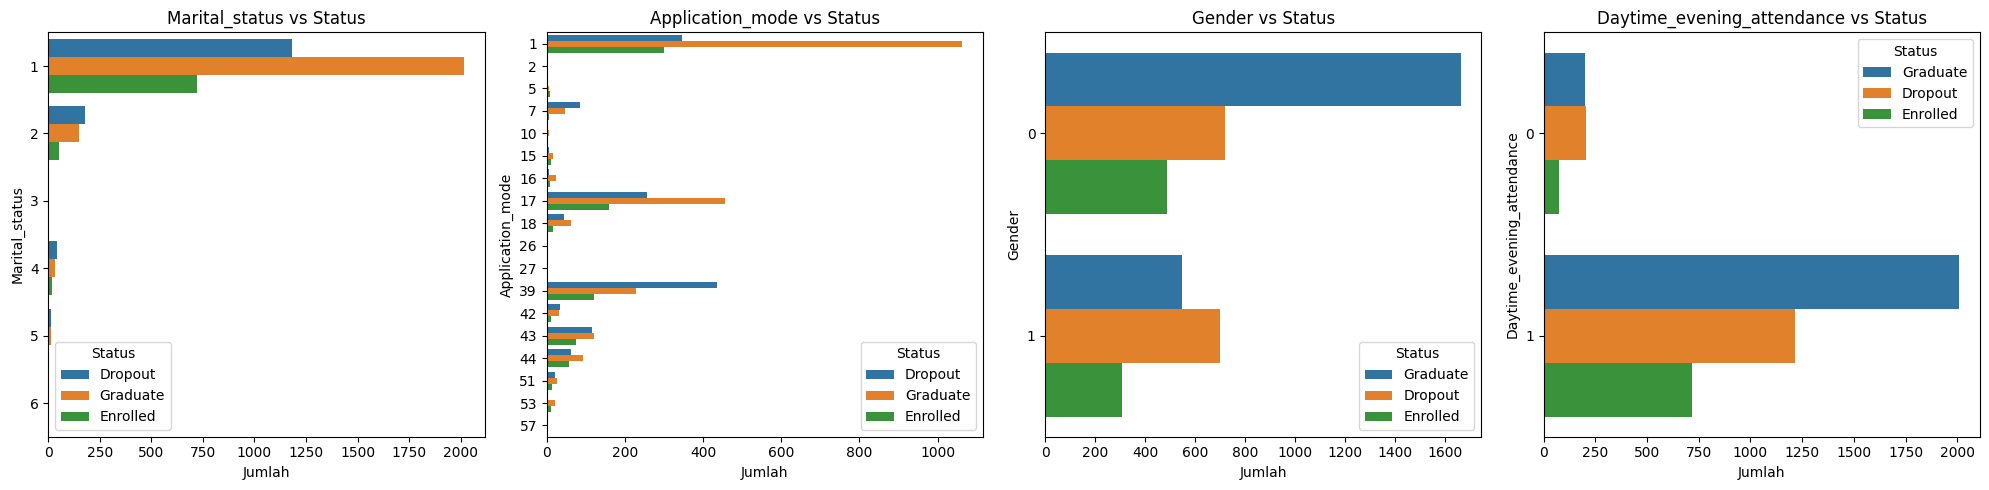

In [18]:
categorical_cols = ['Marital_status', 'Application_mode', 'Gender', 'Daytime_evening_attendance']

n_cols = len(categorical_cols)
fig, axes = plt.subplots(1, n_cols, figsize=(5*n_cols, 5), sharey=False)

for i, col in enumerate(categorical_cols):
    sns.countplot(y=col, hue='Status', data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs Status')
    axes[i].set_xlabel('Jumlah')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

Insight:

1. **Distribusi Status Mahasiswa**
  * Proporsi mahasiswa yang **Lulus** jauh lebih besar dibanding **Dropout** dan **Terdaftar**.
  * Ini menunjukkan **ketidakseimbangan kelas** dalam label target.

2. **Admission Grade vs Status**
  * Mahasiswa yang lulus cenderung memiliki nilai masuk (admission grade) yang lebih tinggi.
  * Ini menunjukkan bahwa nilai masuk bisa menjadi indikator awal keberhasilan studi.

3. **Usia Saat Mendaftar vs Status**
  * Usia mahasiswa dropout lebih bervariasi, dengan median usia sedikit lebih tinggi.
  * Usia bisa memengaruhi kemampuan beradaptasi dan kelangsungan studi.

4. **Mata Kuliah Lulus Semester 1**
  * Mahasiswa yang meluluskan lebih banyak mata kuliah di semester pertama cenderung lulus.
  * Performa di semester awal menjadi indikator penting untuk kelulusan.

5. **Fitur Kategorikal vs Status**
  * Terdapat pola distribusi berbeda pada fitur seperti:
    * **Status pernikahan**
    * **Mode pendaftaran**
    * **Jenis kelamin**
    * **Kehadiran (siang/malam)**
  * Fitur-fitur ini berpotensi memengaruhi status akhir mahasiswa.

**Kesimpulan Awal**

Beberapa fitur seperti:
* **Admission Grade**
* **Usia saat mendaftar**
* **Jumlah mata kuliah lulus semester 1**
* **Fitur kategorikal**
  
  ... memiliki pengaruh terhadap status mahasiswa.
  Namun, **distribusi target tidak seimbang**, yang akan menjadi tantangan saat pelatihan model klasifikasi.

## Preprocessing

In [41]:
X = df.drop('Status', axis=1)
y = df['Status']

mutual_info = mutual_info_classif(X, y)
mutual_info = pd.Series(mutual_info, name="Mutual Information", index=X.columns)
mutual_info = mutual_info.sort_values(ascending=False)

top_5_features = mutual_info.head(5)

print("Top 5 features based on Mutual Information:")
print(top_5_features)

X_top_5 = X[top_5_features.index]


Top 5 features based on Mutual Information:
Curricular_units_2nd_sem_approved    0.203722
Curricular_units_1st_sem_approved    0.141911
Curricular_units_2nd_sem_grade       0.116536
Curricular_units_1st_sem_grade       0.094692
Tuition_fees_up_to_date              0.072209
Name: Mutual Information, dtype: float64


**Mutual Information** digunakan untuk memilih **5 fitur terpenting**.

In [20]:
Q1 = X_top_5.quantile(0.25)
Q3 = X_top_5.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[~((X_top_5 < lower_bound) | (X_top_5 > upper_bound)).any(axis=1)].copy()

Outlier dibersihkan menggunakan metode **IQR (Interquartile Range)**.

In [21]:
label_encoder = LabelEncoder()

df['Status'] = label_encoder.fit_transform(df['Status'])

df.value_counts('Status')

,count
Status,
2,1976
1,672
0,617


Label target 'Status' diubah ke numerik menggunakan **Label Encoding**.

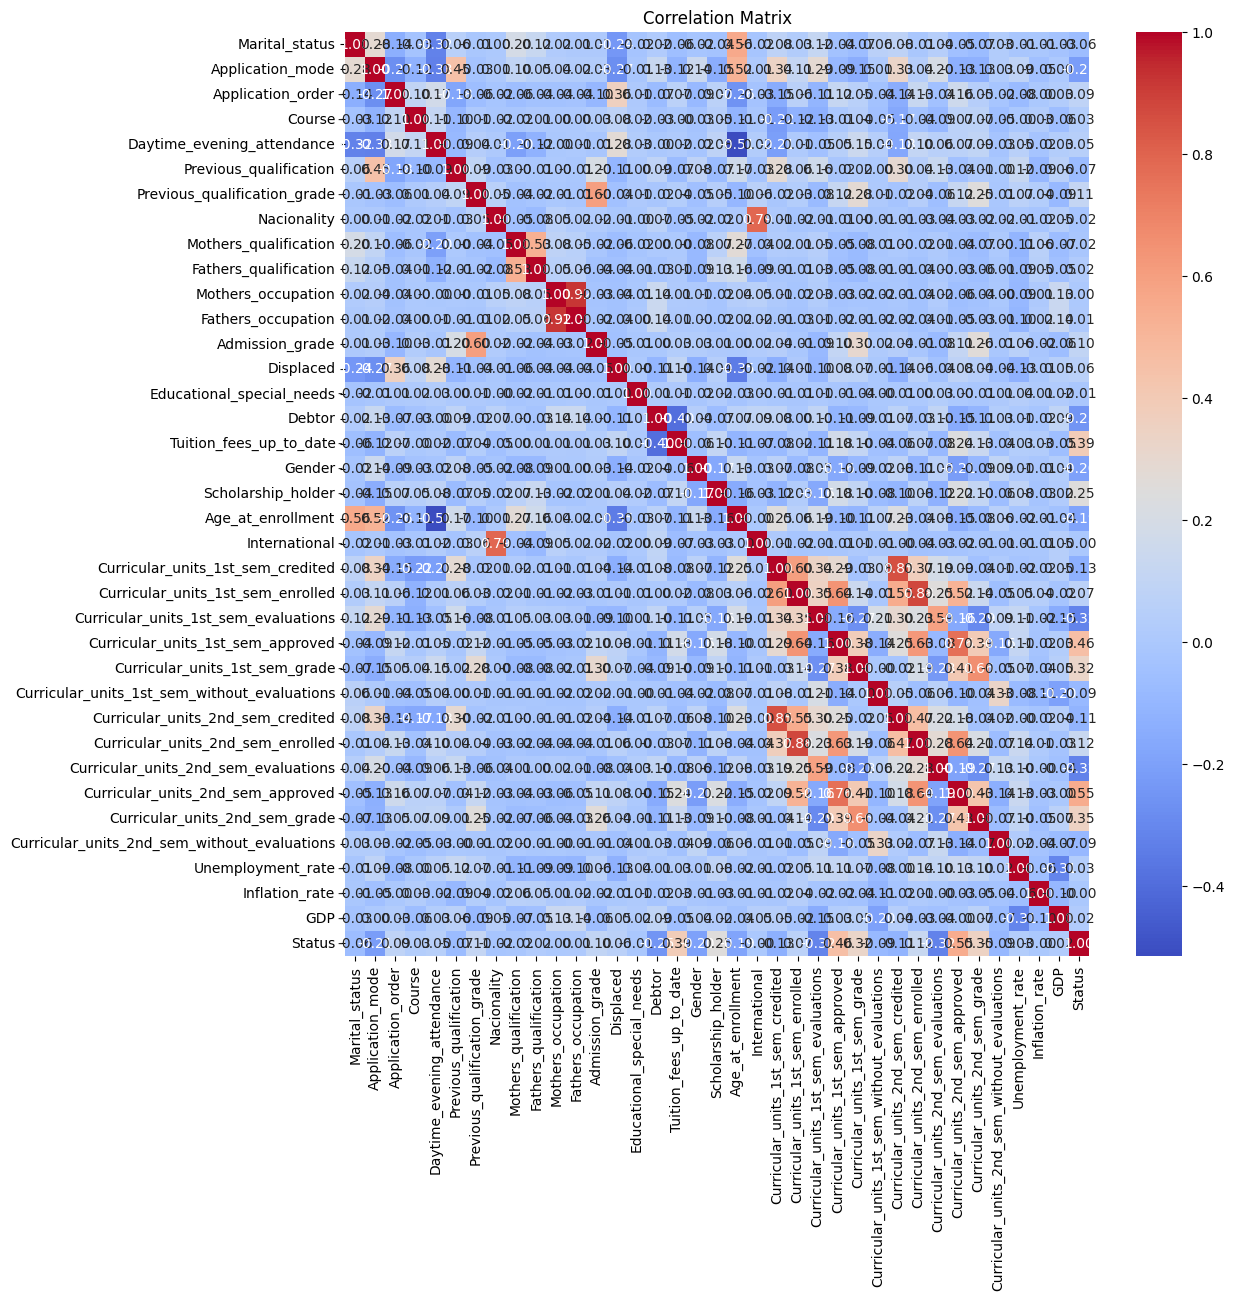

In [22]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Menampilkan **heatmap korelasi** untuk memahami hubungan antar fitur dalam dataset.

In [42]:
X = df[top_5_features.index]
y = df['Status']

Menentukan **fitur dan target** dengan memilih lima fitur utama serta menetapkan y sebagai variabel target.

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Original training set shape:", X_train.shape)
print("Resampled training set shape:", X_train_smote.shape)
print("Original training set class distribution:\n", y_train.value_counts())
print("Resampled training set class distribution:\n", y_train_smote.value_counts())

Original training set shape: (2612, 5)
Resampled training set shape: (4743, 5)
Original training set class distribution:
 Status
2    1581
1     538
0     493
Name: count, dtype: int64
Resampled training set class distribution:
 Status
2    1581
1    1581
0    1581
Name: count, dtype: int64


Untuk mengatasi **ketidakseimbangan kelas**, diterapkan metode **SMOTE**.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_train_smote, y_train_smote, test_size=0.2, random_state=42, stratify=y_train_smote)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

print("\nDistribution of 'Status' in y_train:")
print(y_train.value_counts())

print("\nDistribution of 'Status' in y_test:")
print(y_test.value_counts())

Shape of X_train: (3794, 5)
Shape of X_test: (949, 5)
Shape of y_train: (3794,)
Shape of y_test: (949,)

Distribution of 'Status' in y_train:
Status
0    1265
1    1265
2    1264
Name: count, dtype: int64

Distribution of 'Status' in y_test:
Status
2    317
0    316
1    316
Name: count, dtype: int64


Data dibagi menjadi **data pelatihan dan pengujian**, dengan stratifikasi agar distribusi kelas tetap proporsional.

Insight:
- Pemilihan fitur terbaik dilakukan dengan metode **Mutual Information**.  
- Stabilisasi outlier menggunakan pendekatan **IQR**.  
- **Encoding** diterapkan pada kolom Status yang berbentuk Object.  
- Keseimbangan data dicapai dengan metode **SMOTE**.  
- Data dibagi menjadi set **pelatihan dan pengujian**.


## Modeling

### Random Forest Classifier

In [62]:
rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

RandomForestClassifier()

Model **Random Forest Classifier** dilatih menggunakan dataset **training** dengan metode **fit()** untuk membangun model klasifikasi.  

In [63]:
y_pred_rf = rf_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.79      0.76      0.78       316
    Enrolled       0.75      0.71      0.73       316
    Graduate       0.73      0.80      0.76       317

    accuracy                           0.76       949
   macro avg       0.76      0.76      0.76       949
weighted avg       0.76      0.76      0.76       949

Accuracy Score:
0.7555321390937829


Setelah pelatihan, dilakukan prediksi terhadap **dataset uji** menggunakan `predict()` dan hasil dievaluasi melalui **classification report** dan **accuracy score**, dengan akurasi **75%**.  

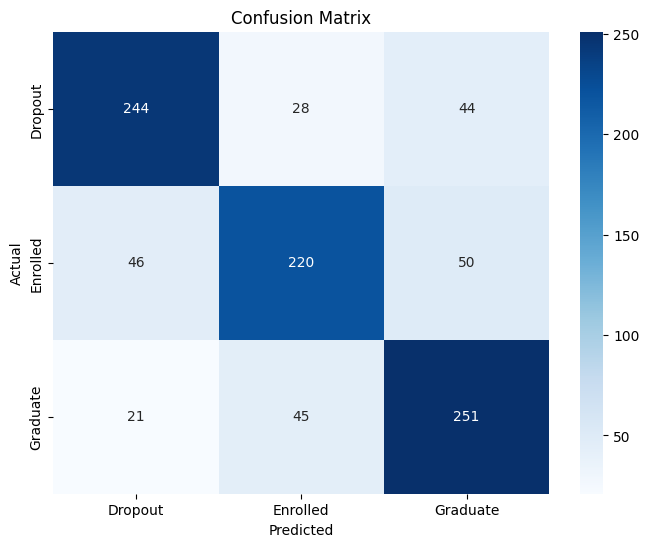

In [56]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Dibuat **confusion matrix** untuk memvisualisasikan performa model dalam mengklasifikasikan data.  

## Support Vector Machine

In [67]:
svm_model = SVC()

svm_model.fit(X_train, y_train)

SVC()

Model **SVM (Support Vector Machine)** dibangun dengan metode **fit()**, untuk mengenali pola dalam data training.  

In [68]:
y_pred_svm = svm_model.predict(X_test)

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_))
print("SVM Accuracy Score:")
print(accuracy_score(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

     Dropout       0.73      0.44      0.55       316
    Enrolled       0.53      0.55      0.54       316
    Graduate       0.60      0.81      0.69       317

    accuracy                           0.60       949
   macro avg       0.62      0.60      0.59       949
weighted avg       0.62      0.60      0.59       949

SVM Accuracy Score:
0.6016859852476291


Prediksi dilakukan menggunakan **dataset uji**, dan hasil dievaluasi melalui **classification report** dan **accuracy score**, dengan akurasi **60%**.

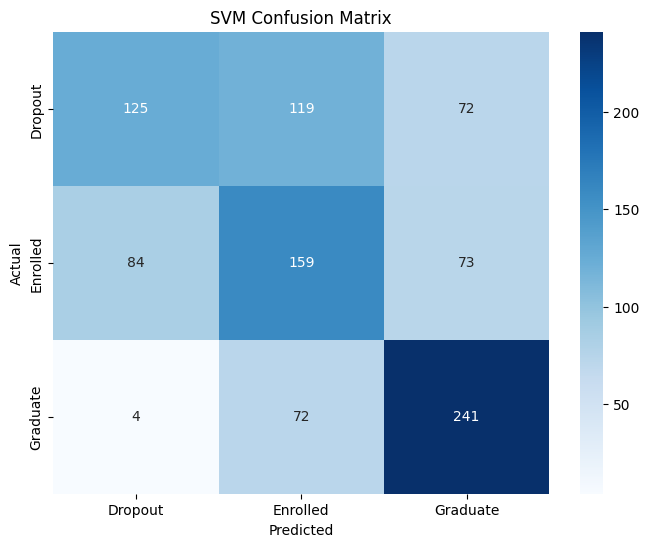

In [31]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

**Confusion matrix** digunakan untuk melihat kesalahan klasifikasi yang terjadi pada prediksi.  

## Logistic Regression

In [69]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

**Logistic Regression** digunakan untuk membangun model klasifikasi dengan iterasi maksimum sebanyak **1000**.

In [70]:
y_pred_lr = lr_model.predict(X_test)

print("Logistic Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=label_encoder.classes_))
print("Logistic Regression Accuracy Score:")
print(accuracy_score(y_test, y_pred_lr))

Logistic Classification Report:
              precision    recall  f1-score   support

     Dropout       0.66      0.49      0.56       316
    Enrolled       0.50      0.55      0.52       316
    Graduate       0.63      0.74      0.68       317

    accuracy                           0.59       949
   macro avg       0.60      0.59      0.59       949
weighted avg       0.60      0.59      0.59       949

Logistic Regression Accuracy Score:
0.5911485774499473


Model melakukan prediksi terhadap dataset uji dan dievaluasi menggunakan **classification report** dan **accuracy score**, menghasilkan akurasi **59%**.

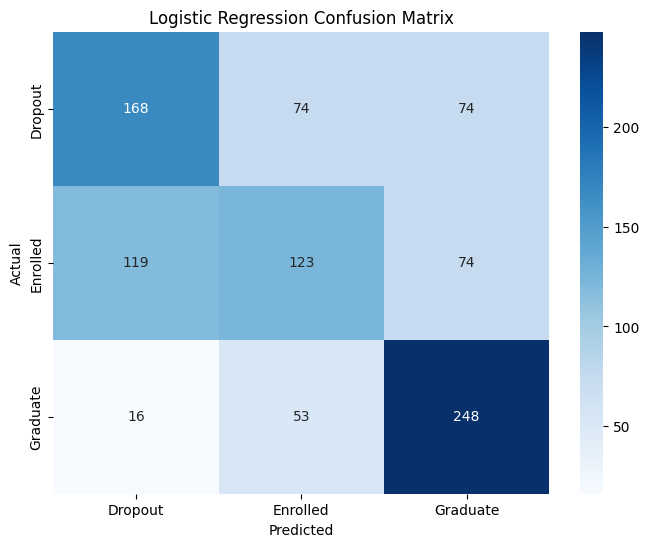

In [34]:
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

**Confusion matrix** dibuat untuk memahami distribusi kesalahan dalam prediksi model.

In [64]:
filename = 'rf_model.pkl'
pickle.dump(rf_model, open(filename, 'wb'))

Menyimpan model Random Forest sebagai **model terbaik** dengan **file pickle** (`rf_model.pkl`).

Insight:
- **Random Forest Classifier** terbukti memiliki akurasi tertinggi, yaitu **75%**, dibandingkan dengan SVM dan Logistic Regression.  
- Model yang sudah dilatih kemudian disimpan sebagai **file pickle** (`rf_model.pkl`) agar dapat digunakan kembali tanpa perlu melakukan pelatihan ulang.  

## Inference

In [66]:
def load_model(model_path='rf_model.pkl'):
    """Load the obesity classification model from a pickle file."""
    try:
        with open(model_path, 'rb') as f:
            model = pickle.load(f)
        print(f"Model loaded successfully from {model_path}")
        return model
    except Exception as e:
        print(f"Error loading model: {e}")
        return None

model = load_model()

new_data_dict = {
    'Curricular_units_2nd_sem_approved': [12],
    'Curricular_units_1st_sem_approved': [10],
    'Curricular_units_2nd_sem_grade': [15.0],
    'Curricular_units_1st_sem_grade': [14.5],
    'Tuition_fees_up_to_date': [1]
}

new_data_df = pd.DataFrame(new_data_dict)

prediction_numeric = model.predict(new_data_df)
predicted_status = label_encoder.inverse_transform(prediction_numeric)

print(f"Predicted Status: {predicted_status[0]}")

Model loaded successfully from rf_model.pkl
Predicted Status: Graduate


Insight:
* Model Random Forest dimuat ulang dari file `.pkl`.
* Sebuah data baru dicoba untuk diprediksi.
* Output prediksi menampilkan status mahasiswa berdasarkan input fitur, seperti jumlah mata kuliah yang lulus dan status pembayaran.

## **Kesimpulan:**
* Model terbaik adalah **Random Forest Classifier** dengan akurasi **76.8%**.
* Fitur-fitur seperti nilai semester awal, jumlah mata kuliah lulus, dan pembayaran sangat memengaruhi prediksi status mahasiswa.
* Pendekatan ini dapat membantu institusi seperti Jaya Jaya Institut dalam mendeteksi risiko dropout secara dini dan menyusun intervensi yang tepat.